<a href="https://colab.research.google.com/github/olaesorun/Ola-Polash_repo/blob/main/Ola__Polas_Web_AnalysisAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install  praw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 1.5 MB/s eta 0:00:00


In [2]:
from os import read
import praw
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from sklearn import linear_model


# Set up Reddit API credentials
reddit = praw.Reddit(
    client_id='CENPGYnDHjEdLdVwW3rY1g',
    client_secret='1kix3HAP4M9VPu2MytpGvGZdo1UMRg',
    user_agent='Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'
)

# Function to download social media data
def download_social_media_data(search_term, num_posts=100):
    subreddit = reddit.subreddit("all")  # Change to the desired subreddit

    # Collect posts based on the search term
    posts = []
    for post in subreddit.search(search_term, limit=num_posts):
        posts.append({
            'Title': post.title,
            'Author': post.author.name,
            'Num_comments': post.num_comments,
            'votes': post.ups,

        })

    # Save data to DataFrame
    df = pd.DataFrame(posts)
    return df

# Save data to CSV
def save_to_csv(data, file_path):
    data.to_csv(file_path, index=False)

# Example usage
search_term = "videos"
data = download_social_media_data(search_term, num_posts=1000)
save_to_csv(data, 'social_media_data.csv')


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



In [3]:
# Create a function to get the subjectivity
def getSubjectivity (text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity (text):
    return TextBlob(text). sentiment.polarity

In [4]:
#Reading the twitter data from CSV file
df = pd.read_csv('social_media_data.csv')

In [5]:
#Create two new columns
df ['Data_Subjectivity'] = df['Title'].apply(getSubjectivity)
df['Data_Polarity'] = df['Title'].apply(getPolarity)

In [6]:
df

,Title,Author,Num_comments,votes,Data_Subjectivity,Data_Polarity
0,Watch my hot sex videos on pornhub link in bio...,Shawnapornhubmodel,0,3,0.850000,0.312500
1,Short videos vs Long videos,markocomics,206,19603,0.350000,-0.025000
2,Videos for free,Holofan4life,171,8988,0.800000,0.400000
3,If Educational Videos Were Filmed Like Music V...,thatguyfromeunue,434,20668,0.250000,0.250000
4,3 of the last 4 videos are list-based videos. ...,FrostyMittenJob,371,1572,0.066667,0.000000
...,...,...,...,...,...,...
211,87% Missing: the Disappearance of Classic Vide...,Ebon_Praetor,453,2193,0.205556,-0.144444
212,These scare bait videos are getting real old,Ashamed_Pizza_7329,284,1104,0.300000,0.150000
213,Polizeigewalt in Idstein: Videos überführen Po...,donz0r,319,931,0.000000,0.000000
214,update: hoovy got his channel abclk but lost v...,Ltnumbnutsthesecond,155,5953,0.000000,0.000000


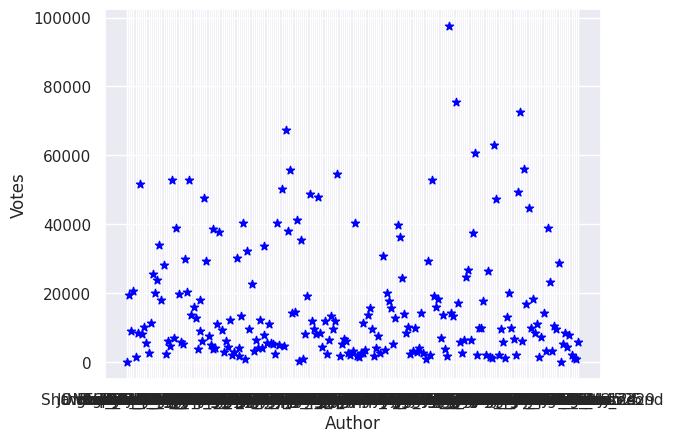

In [16]:
# %matplotlib inline
plt.xlabel('Author')
plt.ylabel('Votes')

plt.scatter(df.Author,df.votes,color='blue',marker='*',)

In [8]:
df

,Title,Author,Num_comments,votes,Data_Subjectivity,Data_Polarity
0,Watch my hot sex videos on pornhub link in bio...,Shawnapornhubmodel,0,3,0.850000,0.312500
1,Short videos vs Long videos,markocomics,206,19603,0.350000,-0.025000
2,Videos for free,Holofan4life,171,8988,0.800000,0.400000
3,If Educational Videos Were Filmed Like Music V...,thatguyfromeunue,434,20668,0.250000,0.250000
4,3 of the last 4 videos are list-based videos. ...,FrostyMittenJob,371,1572,0.066667,0.000000
...,...,...,...,...,...,...
211,87% Missing: the Disappearance of Classic Vide...,Ebon_Praetor,453,2193,0.205556,-0.144444
212,These scare bait videos are getting real old,Ashamed_Pizza_7329,284,1104,0.300000,0.150000
213,Polizeigewalt in Idstein: Videos überführen Po...,donz0r,319,931,0.000000,0.000000
214,update: hoovy got his channel abclk but lost v...,Ltnumbnutsthesecond,155,5953,0.000000,0.000000


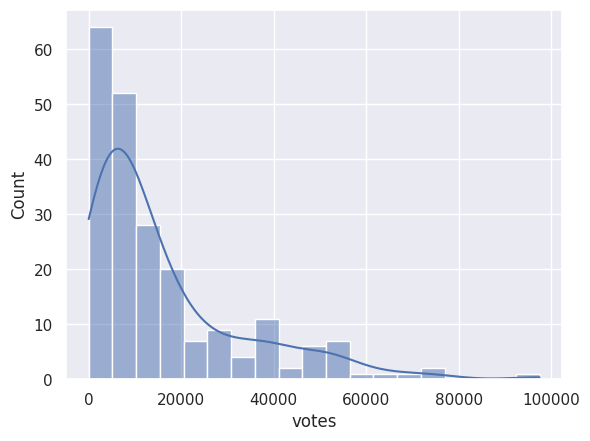

In [9]:
# You can add a kde curve to a histogram by setting the kde argument to True.
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set(style="darkgrid")
sns.histplot(data=df, x="votes",kde=True)
plt.show()

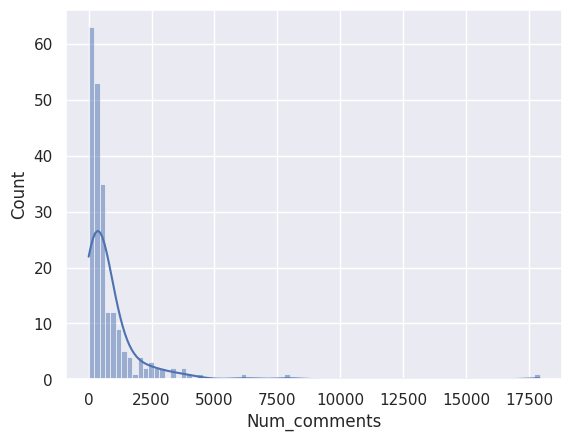

In [10]:
sns.set(style="darkgrid")
sns.histplot(data=df, x="Num_comments",kde=True)
plt.show()

In [11]:
#Evaluating positive, negative and neutral sentimaental analysis and adding it into the dataframe
def getAnalysis (data_value):
    if data_value < 0:
        return 'Negative'
    elif data_value == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [12]:
# Create a new Column with all conditions which we defined based on that give the output like negative, neutral and positive.
df['Data_Analysis'] = df['Data_Polarity'].apply(getAnalysis)

#Print the Dataframe
df

,Title,Author,Num_comments,votes,Data_Subjectivity,Data_Polarity,Data_Analysis
0,Watch my hot sex videos on pornhub link in bio...,Shawnapornhubmodel,0,3,0.850000,0.312500,Positive
1,Short videos vs Long videos,markocomics,206,19603,0.350000,-0.025000,Negative
2,Videos for free,Holofan4life,171,8988,0.800000,0.400000,Positive
3,If Educational Videos Were Filmed Like Music V...,thatguyfromeunue,434,20668,0.250000,0.250000,Positive
4,3 of the last 4 videos are list-based videos. ...,FrostyMittenJob,371,1572,0.066667,0.000000,Neutral
...,...,...,...,...,...,...,...
211,87% Missing: the Disappearance of Classic Vide...,Ebon_Praetor,453,2193,0.205556,-0.144444,Negative
212,These scare bait videos are getting real old,Ashamed_Pizza_7329,284,1104,0.300000,0.150000,Positive
213,Polizeigewalt in Idstein: Videos überführen Po...,donz0r,319,931,0.000000,0.000000,Neutral
214,update: hoovy got his channel abclk but lost v...,Ltnumbnutsthesecond,155,5953,0.000000,0.000000,Neutral
